## Background / Motivation

What motivated you to work on this problem?

Mention any background about the problem, if it is required to understand your analysis later on.

As avid Uber/Lyft riders ourselves, we were naturally drawn to the question of how Ubers/Lyfts are priced -- and which factors contribute most to the pricing of these rides. It comes up a lot in our daily lives, and we wanted to take this as an opportunity to explore this subject more deeply. 

## Problem statement 

Describe your problem statement. Articulate your objectives using absolutely no jargon. Interpret the problem as inference and/or prediction.

For this project, we wanted to undestand how certain ride factors (ex. distance of the trip, timestamp, weather, destination, etc.) relate to the price of a ride. Since our response variable (price of the ride) is continuous, this is a regression problem. Our project incoprorated both prediction and inference. One the one hand, we wanted to be able to build a model to predict the price of rides. In addition, we wanted to figure out which factors had the largest impact on price, which has to do with inference.  

## Data sources
What data did you use? Provide details about your data. Include links to data if you are using open-access data.

We used the “Uber & Lyft Cab prices” dataset on Kaggle (https://www.kaggle.com/datasets/ravi72munde/uber-lyft-cab-prices). The dataset includes information on ride prices (collected for a week in November - December 2018) as well as relevant information such as the distance of the trip, timestamp, weather, and destination. We used these factors to help us predict the price of the ride – and determine which factors seem to have a larger effect on price than others.

## Stakeholders
Who cares? If you are successful, what difference will it make to them?

We had 3 primary stakeholders:

1) Taxi Company and Drivers: they are competitors with Uber/Lyft when it comes to the rideshare market. Through using our model, they can understand rideshare pricing better and adjust accordingly to gain a competitive edge during certain times

2) Uber and Lyft Users: people who use Uber/Lyft can use our model to understand when to use rideshare versus other transportation and use this information to plan ahead around high price times to save money

3) Uber and Lyft Drivers: as they are direct employees of Uber/Lyft and their salary is directly related to the price of the rides, they are large stakeholders. Through using our model, they can better understand how rides are priced, gauge their expected earnings for a given ride, and have more autonomy over their revenue (ex. choose to take rides during high price times).

## Data quality check / cleaning / preparation 

In a tabular form, show the distribution of values of each variable used in the analysis - for both categorical and continuous variables. Distribution of a categorical variable must include the number of missing values, the number of unique values, the frequency of all its levels. If a categorical variable has too many levels, you may just include the counts of the top 3-5 levels. 

If the tables in this section take too much space, you may put them in the appendix, and just mention any useful insights you obtained from the data quality check that helped you develop the model or helped you realize the necessary data cleaning / preparation.

Were there any potentially incorrect values of variables that required cleaning? If yes, how did you clean them? 

Did you do any data wrangling or data preparation before the data was ready to use for model development? Did you create any new predictors from exisiting predictors? For example, if you have number of transactions and spend in a credit card dataset, you may create spend per transaction for predicting if a customer pays their credit card bill. Mention the steps at a broad level, you may put minor details in the appendix. Only mention the steps that ended up being useful towards developing your final model(s).

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
#Weather data distributions
weather = pd.read_csv('weather.csv')
weather.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


In [74]:
weather.isnull().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [75]:
weather.location.nunique()

12

In [76]:
weather.location.value_counts()

Back Bay                   523
Beacon Hill                523
Boston University          523
Fenway                     523
Financial District         523
Haymarket Square           523
North End                  523
North Station              523
Northeastern University    523
South Station              523
Theatre District           523
West End                   523
Name: location, dtype: int64

In [77]:
rides.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [78]:
#Rides data distributions
rides = pd.read_csv('cab_rides.csv')
rides.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [79]:
rides.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [80]:
rides.cab_type.value_counts()

Uber    385663
Lyft    307408
Name: cab_type, dtype: int64

In [81]:
rides.destination.value_counts()

Financial District         58851
Theatre District           57798
Back Bay                   57780
Haymarket Square           57764
Boston University          57764
Fenway                     57757
North End                  57756
Northeastern University    57755
South Station              57749
West End                   57575
Beacon Hill                57403
North Station              57119
Name: destination, dtype: int64

In [82]:
rides.source.value_counts()

Financial District         58857
Theatre District           57813
Back Bay                   57792
Boston University          57764
North End                  57763
Fenway                     57757
Northeastern University    57756
South Station              57750
Haymarket Square           57736
West End                   57562
Beacon Hill                57403
North Station              57118
Name: source, dtype: int64

In [83]:
rides.name.value_counts()

UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
Taxi            55095
UberX           55094
UberPool        55091
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: name, dtype: int64

As can be seen by the distributions charts, the only missing values in the weather data set were for rain and the only missing values for the rides data set were for price. We began our cleaning by filling each missing value of rain to be 0. We discovered that there were no data points in the original weather dataset that were 0 and assumed that when there was no rain, no value was reported. Thus, we imputed 0 for all missing values of rain. We then merged the weather and rides datasets to allow us to use weather when predicting price. After doing so, we droped all observations with missing values for price. Since we are predicting price, we need prices for all rides that are used to train our model. 

Unfortunately, after merging both data sets and dropping observations with no price, we had lost about 690,000 observations. Although this is a significant amount of data lost, our main purpose was to improve upon past prediction models. We wanted to test whether including weather would improve the model's accuracy in predicting price or not. Additionally, because this data was taken over a 1.5 week span, we felt that the 3000 data points left in the data set could still be representative of rides for this time period. 

In [84]:
#distribution of cleaned data
train = pd.read_csv('train_data_report.csv')

In [85]:
train.drop(columns='Unnamed: 0', inplace=True)
train.describe()

,distance,price,surge_multiplier,temp,clouds,pressure,rain,humidity,wind,hour,product_Accessible,product_Basic,product_Lux,product_SUV,product_Sedan,product_Shared,product_XL
count,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000
mean,2.179746,16.823399,1.020439,39.176943,0.686577,998.723226,0.018685,0.759972,8.035526,9.896899,0.078131,0.168747,0.075312,0.173983,0.171164,0.159082,0.173580
std,1.138660,9.719118,0.110672,3.403477,0.289554,8.596076,0.095905,0.103227,3.049207,7.297125,0.268432,0.374604,0.263947,0.379171,0.376728,0.365826,0.378825
min,0.020000,2.500000,1.000000,27.080000,0.000000,990.640000,0.000000,0.590000,0.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.260000,9.500000,1.000000,37.620000,0.480000,991.730000,0.000000,0.670000,6.470000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.170000,14.000000,1.000000,39.100000,0.740000,996.070000,0.000000,0.720000,9.450000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.950000,22.500000,1.000000,41.130000,0.970000,1004.190000,0.000000,0.840000,10.060000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.460000,92.000000,2.000000,52.710000,1.000000,1035.030000,0.780700,0.990000,13.660000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
train.columns

Index(['distance', 'cab_type', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'date_hour', 'temp',
       'clouds', 'pressure', 'rain', 'humidity', 'wind', 'hour', 'date', 'day',
       'product', 'product_Accessible', 'product_Basic', 'product_Lux',
       'product_SUV', 'product_Sedan', 'product_Shared', 'product_XL'],
      dtype='object')

In [87]:
train.cab_type.value_counts()

Uber    1255
Lyft    1228
Name: cab_type, dtype: int64

In [88]:
train.destination.value_counts()

Fenway                     229
Theatre District           223
North Station              217
Beacon Hill                216
South Station              213
Back Bay                   210
Financial District         209
Haymarket Square           203
Boston University          201
West End                   199
North End                  197
Northeastern University    166
Name: destination, dtype: int64

In [89]:
train.source.value_counts()

Haymarket Square           263
North Station              225
Fenway                     217
Northeastern University    213
Theatre District           207
Financial District         205
Boston University          204
Beacon Hill                200
North End                  194
West End                   189
South Station              183
Back Bay                   183
Name: source, dtype: int64

As for preparation, we created day and hour columns out of the timestamp column. This was done in order to test if hour and day had any influence on demand and thus on price. We also combined similar product types of Uber and Lyft (ex: UberXL and Lyft XL became 'XL') since price is likely to be similar based on which product a user chooses.

## Exploratory data analysis

Put the relevant EDA here (visualizations, tables, etc.) that helped you figure out useful predictors for developing the model(s). Only put the EDA that ended up being useful towards developing your final model(s). 

List the insights (as bullet points) you got from EDA that ended up being useful towards developing your final model. 

Again, if there are too many plots / tables, you may put them into appendix, and just mention the insights you got from them.

While we did do extensive EDA with binning continuous variables and analyzing distributions, correlations, and other possible relationships using boxplots and scatterplots, the only real relevant EDA ended up being for distance and product type (the relevant plots will be included in appendix).
- A barplot of price against binned distance yielded that the increase in price increased slightly more as binned distance increased, so we decided it might have been useful to do a log transformation on distance if it ended up being that a non-linear relationship between price and distance was useful for the model (which ended up being useful in our final model).
- Additionally, we saw that boxplots of price for different product types showed us that price did vary noticeably across different product types, which ended up being one of the more important variables used in the final model in the form of dummy variables for these different product types.
- The rest of the plots/tables ended up yielding to us that there was in fact little trend or difference between values of different variables for our model, which eventually ended up yielding correct information that the rest of these variables were not useful in helping us develop our final model and did not end up being included as important predictors.

## Approach

What kind of a model (linear / logistic / other) did you use? What performance metric(s) did you optimize and why?

Is there anything unorthodox / new in your approach? 

What problems did you anticipate? What problems did you encounter? Did the very first model you tried work? 

Did your problem already have solution(s) (posted on Kaggle or elsewhere). If yes, then how did you build upon those solutions, what did you do differently? Is your model better as compared to those solutions in terms of prediction / inference?

**Important: Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.**

The model that we used was an initial single linear regression model, several multiple linear regression models, and finally a final multiple linear regression model using forward stepwise selection. We decided to optimize for the performance metric of RMSE. We did this because we wanted to penalize large errors, since large errors could mean that the customer ends up paying a much higher price than they were expecting if using our model to try and predict the ride price (which could be an undue, large financial strain for them). Therefore, since RMSE properly penalizes these large errors versus other options like MAE (which equally penalizes the error from each observation), we will proceed with utilizing this performance metric to optimize. 

There was nothing too unorthodox or new in our approach. We decided to start with a base/naive model with what we thought would be the singlemost important predictor (distance), and then we moved onto using all of the predictors in the dataset and the new predictor variables that we created to get new multiple linear regression models. Lastly, we used forward stepwise selection to get a multiple linear regression model considering all of the previously used predictor variables and all possible two-factor interactions as potential predictors. We decided to use forward stepwise selection because doing so could be used for variable selection and was more computationally feasible than best subset selection given our 171 predictors (incredibly large number of predictors). Further, since we start with the null model of only the intercept and gradually add predictor variables one at a time, we prefered this to backward stepwise selection since the larger number of predictors allows us to identify important ones without including irrelevant ones. We made two final models, one that was best for inference with VIF values that did not indicate problematic amounts of multicollinearity, and one for prediction.

We anticipated problems when it came to preparing the actual data that allowed us to go about our approach. Specifically, there was only select weather data available for various source and destination locations on specific dates and at specific times. As such, we did in fact encounter this problem when approaching how to best clean and prepare the data itself before going about developing our models. Additionally, we anticipated the problem of multicollinearity when it came to the dummy variables we were going to create on the type of ride and with weather variables. Because of this, we made sure to look at VIF values when it came to our final multiple linear regression model with a unique model just for inference and one for prediction. Lastly, we wanted to potentially focus on autocorrelation as a possible problem we anticipated and wanted to explore in our data further. The first model that we tried including our created variables and the weather variables did not have a large improvement compared with the base/naive model of all the ride dataset variables. 

Our problem did already have some solutions posted on Kaggle trying to predict the ride price of Uber/Lyft rides in the same datasets. The solution[1] that we did look at closer decided to approach the problem we encountered with data cleaning/preparation of the weather variables by averaging them out for each source and destination location. After further analysis, we decided that this wouldn't be the best approach, since the average rainfall, cloud coverage, etc. of a given location isn't what we wanted to examine as predictors. Instead, we wanted accurate weather information of an actual given time for a location, which is why we took the steps we did to clean the data and get only the observations that had said weather data for locations at specific times. Further, this solution did not handle the potential issues with multicollinearity or exploration of autocorrelation, which we decided to analyze to build upon this solution. While this model only ended up analyzing R-squared as a performance metric, we do believe that our model was better compared to this solution. Although we cannot compare by RMSE, the solution's model does little to build upon the multiple linear regression model RMSE with all the train and weather predictor variables, and as such, we believe that our final regression model does in fact do better when compared to this solution. Additionally, since this solution's model does not handle the possibility of multicollinearity, we believe that our final model is better since we have confirmed that no problematic amounts of multicollinearity exist. 

## Developing the model

Explain the steps taken to develop and improve the base model - informative visualizations / addressing modeling assumption violations / variable transformation / interactions / outlier treatment / influential points treatment / addressing over-fitting / addressing multicollinearity / variable selection - stepwise regression, lasso, ridge regression). 

Did you succeed in achieving your goal, or did you fail? Why?

**Put the final model equation**.

**Important: This section should be rigorous and thorough. Present detailed information about decision you made, why you made them, and any evidence/experimentation to back them up.**

The base model was created as a single linear regression model using distance as the only predictor variable and price as the response variable. The resulting RMSE for test data of the model was approximately 8.67 USD. The mean for the price of the cleaned data observations was approximately 16.32 USD and the standard error was approximately 9.22 USD. We decided to make a better base model as a multiple linear regression model using all of the variables from the ride dataset as predictor variables (including distance, source, destination, name, product_id, and cab_type but not surge_multiplier, since this would not be known by the stakeholders at the time of the prediction). We made this decision because we felt that it would be a better representation of comparison for our efforts in improving the base model. The resulting RMSE for test data of the better initial model was approximately 3.06 USD. 

From this, we examined the predictor variables for potential variable transformations that would be helpful in improving model performance as measured by RMSE for test data. Ultimately, we discovered one possible non-linear relationship between distance and price from a barplot of price against binned distance (with the price increasing slightly more as binned distance increased) that was shown in our code report. As such, we decided it would be prudent to examine whether a log(distance) transformation would improve RMSE if included in a model (which it ended up doing) because of the possible non-linear relationship between price and distance. 

Next, we decided to examine whether this base multiple linear regression model also violated any modeling assumptions. Specifically, we did so by plotting residuals against fitted values. While this base model did mostly seem to not violate the linearity assumption, there did seem to be a problematic trend as the fitted values increased that residuals tended to stray away from the line of residuals = 0 that could mean it violated the constant variance assumption. As such, we then thought that it would be a good next step to use log(price) as our response variable in the next model we developed. Since this log transformation of price will result in a higher shrinkage of larger values, to some extent we were hoping that this would resolve this issue. 

We then went about approaching 2-factor interactions and variable selection by creating a final multiple linear regression model for prediction through forward stepwise selection. We decided to use forward stepwise selection because doing so could be used for variable selection and was more computationally feasible than best subset selection given our 171 predictors (incredibly large number of predictors). Further, since we start with the null model of only the intercept and gradually add predictor variables one at a time, we prefered this to backward stepwise selection since the larger number of predictors allows us to identify important ones without including irrelevant ones. We made two final models, one that was best for inference with VIF values that did not indicate problematic amounts of multicollinearity, and one for prediction. For the model used for prediction, we got a final RMSE of 2.69 USD for test data, which was an improvement from our base model.

We decided to explore whether the presence of outliers and influential points could impact the performance of our lasso regression model. We examined this both in large dataset with 690,000 observations and the smaller dataset of about 3000 observations to ensure a thorough analysis of influential points. We started by identifying outlying observations by looking at the studentized residuals. The larger dataset, however, was too large for this code to run so we used standardized residuals which is the next best option. Since our model is mainly concerned with prediction and outliers impact inference, we didn't read too much into the outlying observations for each dataset. We then got the leverage for each point and classified an observation as high leverage if it was greater than 4 times the average leverage. Applying this to each dataset, we found that the smaller dataset had 0 high leverage points. This means that there would be no influential points either, so there were no possible improvements to be made for the model using the smaller dataset. The larger dataset did ultimately have high leverage points, and influential points as well. However, when these were removed, there was no effect on the model RMSE, so there was no benefit to prediction in removing influential points. Ultimately, our analysis of influential points determined that they did not have a significant impact on the model.

We examined the possible problem of overfitting in this final linear regression model that we developed. We used RSE as a test of whether the final regression model was in fact overfitting. From our calculations, we found that the RSE was 3.06 USD. Compared with the RMSE value for the model for test data of 2.69 USD, the RSE was comparable with that of the RMSE. As such, it means that we can conclude from interpreting these results that the final linear regression model was not overfitting. Should the model return a far lower RSE for the train data than the RMSE for test data, this means that the model parameters were only optimized for traiing data and thus overfit. However, this was not the case because the two values were comparable, as explored in the calculations previously mentioned. 

We found problematic amounts of multicollinearity in our final model with interactions being used for prediction. Due to the presence of problematic amounts of multicollinearity in our final model for prediction (VIF values greater than 10), we decided to use forward stepwise selection on just the predictor variables to get a model for inference. We ended up getting a subset of predictor variables in this new model that did not have problematic amounts of multicollinearity (highest VIF value was approximately 7). 

We explored if autocorrelation was present in our model since we were dealing with time of day. To set this up, we transformed the data into a data frame where each observation was the average price and number of rides for an hour in a day. We used the larger dataset for this analysis since it had complete information in terms of dates. Our analysis showed that there did not exist high correlations for various lags, so we determined autocorrelation was not a factor in our model. Additionally, accounting for autocorrelation wouldn’t make sense as our stakeholders don’t have information on how many rides took place in previous hours of previous days. Therefore, we did not take autocorrelation into account for the final model.

## Limitations of the model with regard to inference / prediction

If it is inference, will the inference hold for a certain period of time, for a certain subset of population, and / or for certain conditions.

If it is prediction, then will it be possible / convenient / expensive for the stakeholders to collect the data relating to the predictors in the model. Using your model, how soon will the stakeholder be able to predict the outcome before the outcome occurs. For example, if the model predicts the number of bikes people will rent in Evanston on a certain day, then how many days before that day will your model be able to make the prediction. This will depend on how soon the data that your model uses becomes available. If you are predicting election results, how many days / weeks / months / years before the election can you predict the results. 

When will your model become too obsolete to be useful?

For the inference portion of our project, the inference technically holds for Boston rides, since the dataset only contains Boston rides data observations. However, should our stakeholders want to abstract our analysis on which predictor variables are relatively the most important predictors for ride price, we would need to redevelop our models with data from other cities with the same methods we used. However, to a large extent, the general trends will remain true regardless of the city, such that the overall importance of predictors for ride price can remain more or less useful in other major cities like Boston. Additionally, because this data was from 2018, the importance of predictors might be slightly outdated. However, from research knowing that distance and demand for rides impact the pricing algorithms on Uber/Lyft rides, we still see that this same relative importance of predictors will likely remain similar for rides today. 

For the prediction portion of our project, the stakeholder will be able to predict the outcome approximately one week out before the outcome occurs up until the actual ride takes place. Since we are using the type of ride, whether the ride was Uber/Lyft, and various weather variables to predict the price of a ride, this information will all become fairly accurate and available a week before one will take the ride (assuming that they have access to weather data through applications/websites that are usually accurate a week prior). If they have the information available about when they are preparing to take the ride and what type of ride they will take, then Uber and Lyft users are able to use our final model to predict what the price of their ride will likely be. Additionally, the same applies for Uber/Lyft drivers and taxi companies and drivers on predicting the likely price of Uber/Lyft rides with the given data. Further, we noted previously that since the data is for Boston rides only, the analysis may only be applicable for Boston (while possibly for other major cities), and the model can be redeveloped with new data for other cities, as well. It is also important to note that due to using a smaller weather dataset than rides dataset, when combined, we lost many data points. Our final data set had very limited data points for Friday, Saturday, and Sunday. Thus, our model may be less accurate for predicting prices on the weekends when demand could be different. However, if more data is collected and the same process of model creation is followed, predictions will become more accurate in the case that our limited weekend data is not representative of all rides on weekends. 

The model will likely become too obsolete to be useful for prediction in coming years as Uber/Lyft change their pricing algorithm. However, approaching the development of models in a similar way to how we did with the new data can be done to make it more relevant. However, although the relative importance may shift slightly compared to other predictors, largely the inference part of our project won't become too obsolete for quite some years, given that, for instance, distance and the type of ride will remain largely important in Uber/Lyft's pricing algorithms. 

## Other sections *(optional)*

You are welcome to introduce additional sections or subsections, if required, to address any specific aspects of your project in detail. For example, you may briefly discuss potential future work that the research community could focus on to make further progress in the direction of your project's topic.

## Conclusions and Recommendations to stakeholder(s)

What conclusions do you draw based on your model? If it is inference you may draw conclusions based on the coefficients, statistical significance of predictors / interactions, etc. If it is prediction, you may draw conclusions based on prediction accuracy, or other performance metrics.

How do you use those conclusions to come up with meaningful recommendations for stakeholders? The recommendations must be action-items for stakeholders that they can directly implement without any further analysis. Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

If your recommendations are not practically implementable by stakeholders, how will they help them? Is there some additional data / analysis / domain expertise you need to do to make the recommendations implementable? 

Do the stakeholder(s) need to be aware about some limitations of your model? Is your model only good for one-time use, or is it possible to update your model at a certain frequency (based on recent data) to keep using it in the future? If it can be used in the future, then for how far into the future?

Based on our model, distance and product type are the most important factors that determine the price of a ride, while time of day, source/destination, and even weather had little impact. Additionally, our model can accurately predict the price of a ride in Boston with an RMSE of 2.69 USD. We recommned that Uber and Lyft riders should walk (if possible) to decrease ride distances and check both Uber and Lyft ride offerings to maximize savings. These would be more impactful than trying to plan a schedule of taking rides at certain times from certain places as those minimally impact ride price. For rideshare drivers, we recommend that they become drivers for both Uber and Lyft, so they can compare the prices of each at different times to maximize revenue. Finally, we recommend Taxi drivers who want to make competitive pricing can use our model to accurately predict the competition ride price to price lower and attract more customers with their better rates. This would be specifically useful to adjust their rates based on distance, as they could see how their prices for a ride of a certain distance compare to that of rideshare companies. One limitation of the model is that our data only considers rides in Boston for a 3 week period. Ride prices could fluctuate marginally in different places during different times of the year, resulting in a potential increase in the RMSE of our model. However, we can reasonably anticipate the general trends of our model to stay consistent regardless of urban area or time of year. This model would benefit from being updated yearly to account for inflation, however. A second limitation of the model is that it wasn't able to quite capture trends in demand for rides using weather, location, and time of day. From our personal experience, we know that demand surges can be hyper-localized: rideshare prices around a stadium/arena after a concert or sporting event tend to skyrocket for example. Surges like these are difficult to predict with a model as they require ultra-specific data about different locations at different times. It would be beneficial to the stakeholders if a model to predict this demand could be developed, but for now riders, drivers, and Taxi should be aware of events near their area and use their intuition regarding influences of demand. 

## GitHub and individual contribution {-}

Put the **Github link** for the project repository.

https://github.com/cndywu/TheYelpers

Add details of each team member's contribution in the table below.

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 50%;">
       <col span="1" style="width: 15%;"> 
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Contributed aspects</th>
    <th>Details</th>
    <th>Number of GitHub commits</th>
  </tr>
  <tr>
    <td>Michael Kim</td>
    <td>Model Approach Creation, Model Development, and Importance of Predictors (Inference)</td>
    <td>Created the base, intermediate, and final models; examined transformations, inference, model assumptions, overfitting, and multicollinearity; did analysis using magnitude of coefficients to find relative importance of predictor variables.</td>
    <td>29</td>
  </tr>
  <tr>
    <td>Cindy Wu</td>
    <td>Weather, location, product, and distance EDA and abstract description</td>
    <td>Binned weather variables (wind/pressure/humidity) to determine relationship between different weather elements and pricing; created an indicator value for bad/good weather to see if general good/bad weather made an impact on pricing; looked into location to see whether source/destination had a relationship with price.</td>
    <td>17</td>
  </tr>
    <tr>
    <td>Keaton Olds</td>
    <td>Outlier and influential points treatment, Autocorrelation</td>
    <td>Identified outliers/influential points and analayzed their effect on the model; examined autocorrelation to determine if it was impacting the model</td>
    <td>21</td>    
  </tr>
    <tr>
    <td>Sabrina Kozarovitsky</td>
    <td>Hour and day exploratory data analysis, combined weather/hour/day exploratory data analysis </td>
    <td>Cleaned and prepared data for EDA use, analyzed effects of busier hours on demand for rides, attempted to analyze demand by day but data was too limited, combined Cindy's weather EDA findings to further analyze hours</td>
    <td>27</td>    
  </tr>
</table>

List the **challenges** you faced when collaborating with the team on GitHub. Are you comfortable using GitHub? 
Do you feel GitHuB made collaboration easier? If not, then why? *(Individual team members can put their opinion separately, if different from the rest of the team)*

Our team faced challenges getting acclimated to utilizing GitHub in collaborating, since this was many of our first times using the platform. We found ourselves much more comfortable using GitHub as the project progressed, however, we still feel that there are aspects to the platform that we are unfamiliar with (branches, pull requests, etc.). We think that GitHub did make it easier in having a centralized place to do all of our collaboration; however, we felt that it was tedious to remind each other when we were committing to avoid overwriting other contributions from commits and pushes.  

## References {-}

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

[1] rajg28. (2022, July 14). Uber fare prediction. Kaggle. Retrieved March 15, 2023, from https://www.kaggle.com/code/rajg28/uber-fare-prediction 


## Appendix {-}

You may put additional stuff here as Appendix. You may refer to the Appendix in the main report to support your arguments. However, the appendix section is unlikely to be checked while grading, unless the grader deems it necessary.

<AxesSubplot:xlabel='distance_binned', ylabel='price'>

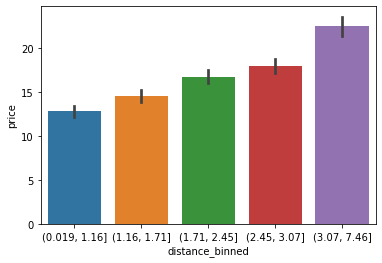

In [5]:
testing_train = train.loc[:, ['price', 'distance']]
testing_train['distance_binned'] = pd.qcut(testing_train['distance'], 5)
sns.barplot(data = testing_train, x = 'distance_binned', y = 'price')

<AxesSubplot:xlabel='product', ylabel='price'>

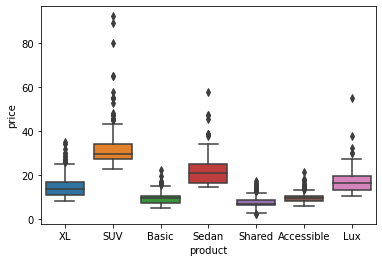

In [6]:
sns.boxplot(data = train, x = 'product', y = 'price')